# Bank Customer Churn

## Task A)

### i. What is the proportion of the customers that are still using the banking services compared to those that have left in the period covered in the dataset? Is there a significant difference in the proportion that the bank authority should be worried about?

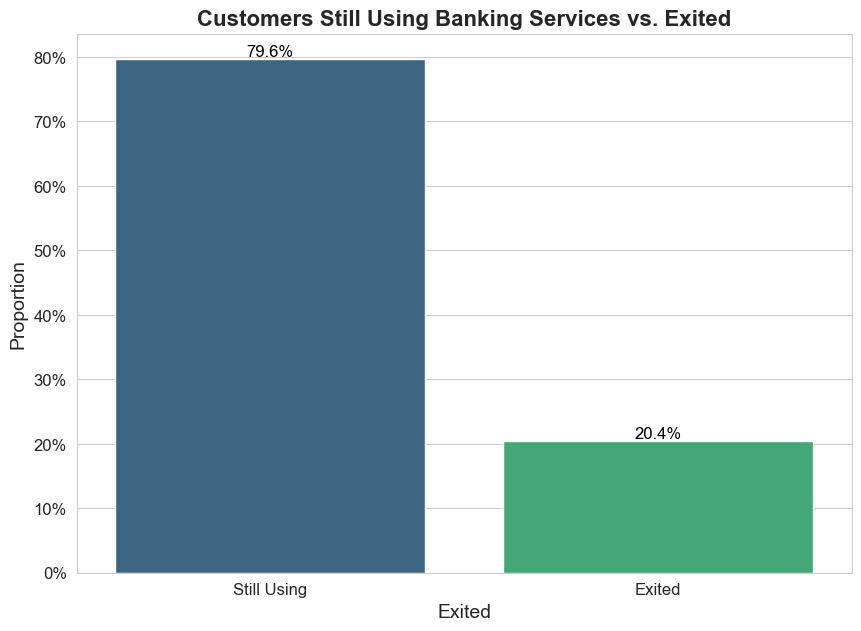

        Status  Proportion
0  Still Using    0.796493
1       Exited    0.203507


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data = pd.read_csv('Main Sample.csv')

# Calculating the proportion of customers who are still using the banking services and those who have left
customer_count = data['Exited'].value_counts()
customer_proportion = customer_count / data.shape[0]

# Plotting a bar chart
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")
sns.barplot(x=customer_proportion.index, y=customer_proportion.values, palette='viridis')
plt.xlabel('Exited', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title('Customers Still Using Banking Services vs. Exited', fontsize=16, fontweight='bold')
plt.xticks([0, 1], ['Still Using', 'Exited'], fontsize=12)
plt.yticks(fontsize=12)

# Format y-axis as percentage
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

# Add data labels on bars
for index, value in enumerate(customer_proportion.values):
    plt.text(index, value, '{:.1%}'.format(value), ha='center', va='bottom', fontsize=12, color='black')

plt.savefig('Q1.png', dpi=300)
plt.show()

# Tabulating the findings
proportion_table = pd.DataFrame({'Status': ['Still Using', 'Exited'], 'Proportion': customer_proportion.values})
print(proportion_table)

### ii. What is the relationship between the number of complaints received by the bank authorities and the number of exited customers?

In [2]:
# Creating a crosstab for complaints and exited customers
complaints_exited_crosstab = pd.crosstab(data['Complain'], data['Exited'])

# Calculating the correlation coefficient between complaints and exited customers
correlation_coefficient = data['Complain'].corr(data['Exited'])

# Displaying the crosstab and the correlation coefficient
print("Crosstab between Complaints and Exited Customers:\n")
print(complaints_exited_crosstab)
print("\nCorrelation Coefficient: {:.4f}".format(correlation_coefficient))

Crosstab between Complaints and Exited Customers:

Exited       0     1
Complain            
0         7939     4
1           10  2027

Correlation Coefficient: 0.9957


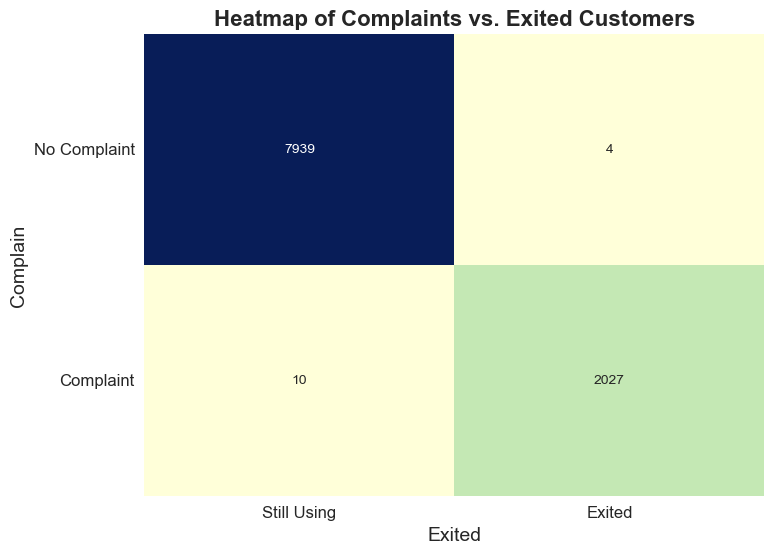

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a crosstab for complaints and exited customers
complaints_exited_crosstab = pd.crosstab(data['Complain'], data['Exited'])

# Plotting a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(complaints_exited_crosstab, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Exited', fontsize=14)
plt.ylabel('Complain', fontsize=14)
plt.title('Heatmap of Complaints vs. Exited Customers', fontsize=16, fontweight='bold')
plt.xticks([0.5, 1.5], ['Still Using', 'Exited'], fontsize=12)
plt.yticks([0.5, 1.5], ['No Complaint', 'Complaint'], fontsize=12, rotation=360)
plt.savefig('Q2.png', dpi=300)
plt.show()

### iii. What are the characteristics and statistics (in terms of gender, age groups, and tenure etc,) of the customers that are more likely to complain? Provide an informative profile description of those type of customers.

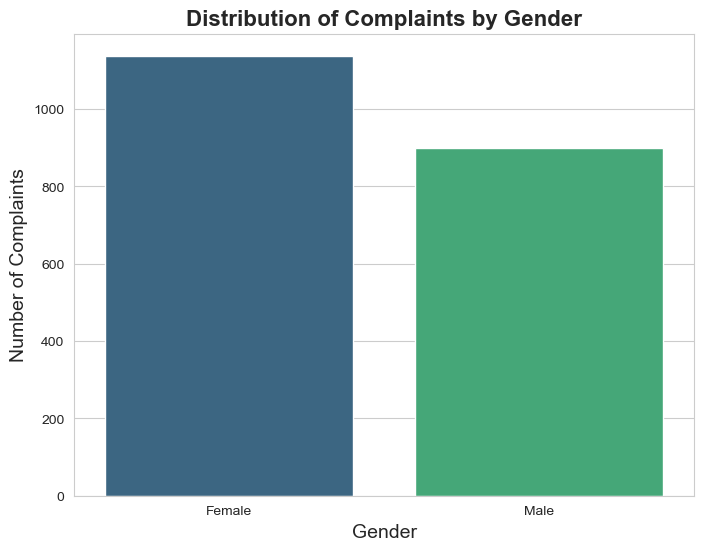

Distribution of Complaints by Gender:

        Gender
Female    1138
Male       899 



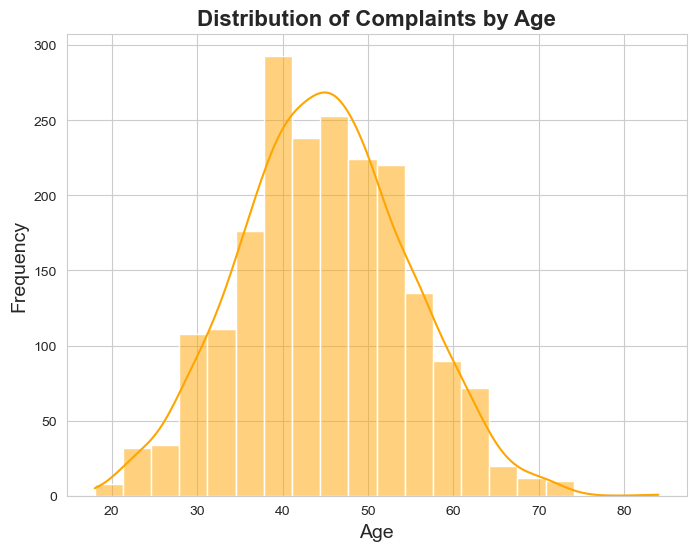

Distribution of Complaints by Age:

       Age_Group
18-29        123
30-39        479
40-49        802
50-59        484
60-69        132
70+           15 



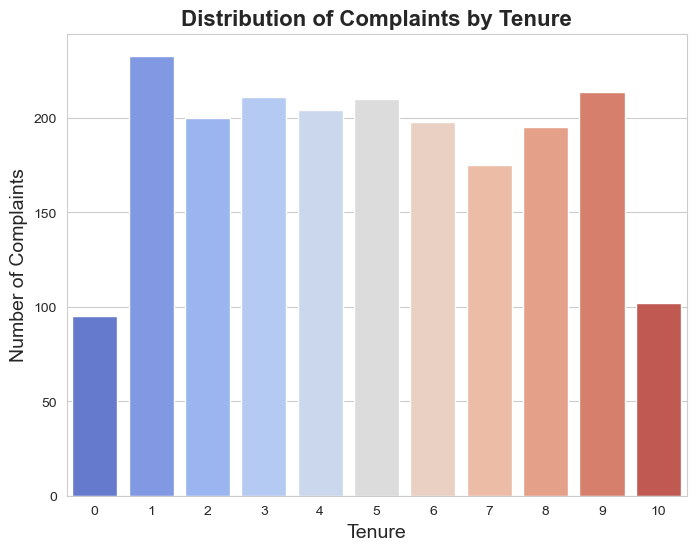

Distribution of Complaints by Tenure:

    Tenure
1      233
9      214
3      211
5      210
4      204
2      200
6      198
8      195
7      175
10     102
0       95 



In [4]:
# Filter data to include only customers with complaints and create a copy
complaining_customers = data[data['Complain'] == 1].copy()

# 1. Bar plot for the distribution of complaints by gender
gender_counts = complaining_customers['Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Complaints', fontsize=14)
plt.title('Distribution of Complaints by Gender', fontsize=16, fontweight='bold')
plt.savefig('Q3Gender.png', dpi=300)
plt.show()

# Displaying the gender distribution table
print("Distribution of Complaints by Gender:\n")
print(gender_counts.to_frame(), "\n")

# 2. Histogram for the distribution of age among customers who complain
plt.figure(figsize=(8, 6))
sns.histplot(complaining_customers['Age'], bins=20, kde=True, color='orange')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Complaints by Age', fontsize=16, fontweight='bold')
plt.savefig('Q3Age.png', dpi=300)
plt.show()

# Create age bins
age_bins = [18, 29, 39, 49, 59, 69, 120]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
complaining_customers['Age_Group'] = pd.cut(complaining_customers['Age'], bins=age_bins, labels=age_labels)

# Count complaints in each age bin
age_counts = complaining_customers['Age_Group'].value_counts().sort_index()

# Displaying the age distribution table
print("Distribution of Complaints by Age:\n")
print(age_counts.to_frame(), "\n")

# 3. Bar plot for the distribution of complaints by tenure
tenure_counts = complaining_customers['Tenure'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=tenure_counts.index, y=tenure_counts.values, palette='coolwarm')
plt.xlabel('Tenure', fontsize=14)
plt.ylabel('Number of Complaints', fontsize=14)
plt.title('Distribution of Complaints by Tenure', fontsize=16, fontweight='bold')
plt.savefig('Q3Tenure.png', dpi=300)
plt.show()

# Displaying the tenure distribution table
print("Distribution of Complaints by Tenure:\n")
print(tenure_counts.to_frame(), "\n")

### iv. Is there a significant difference between the credit scores of all the customers that have complained and those who have not in the period covered in the dataset?

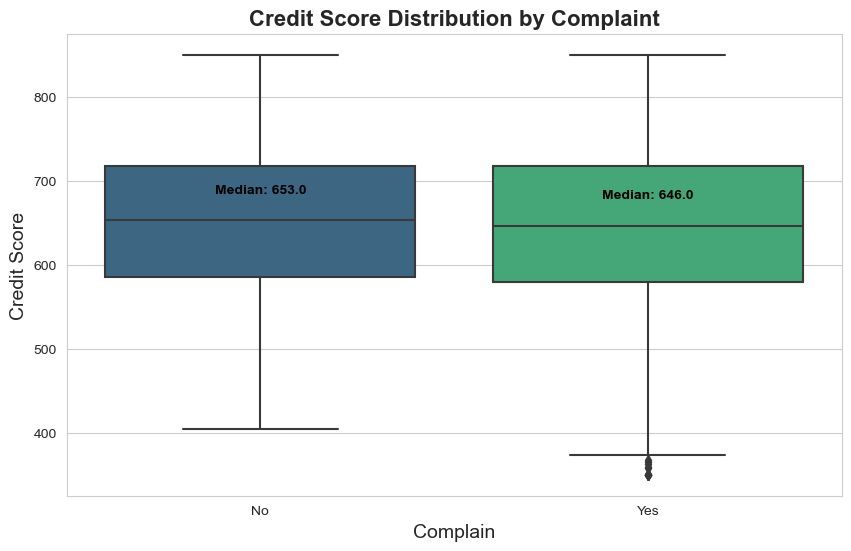

Mean Credit Scores:

          CreditScore
Complain             
0          651.806244
1          645.660285 

Median Credit Scores:

          CreditScore
Complain             
0               653.0
1               646.0 



In [5]:
import numpy as np

# Group customers by whether they have complained or not
grouped_customers = data.groupby('Complain')

# Create a box plot to visualize the distribution of credit scores for both groups
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x=data['Complain'], y=data['CreditScore'], palette='viridis')
plt.xlabel('Complain', fontsize=14)
plt.xticks(np.arange(2), ['No', 'Yes'])
plt.ylabel('Credit Score', fontsize=14)
plt.title('Credit Score Distribution by Complaint', fontsize=16, fontweight='bold')

# Add labels to show the median credit scores for each group
medians = grouped_customers['CreditScore'].median().values
vertical_offset = data['CreditScore'].median() * 0.05
for xtick, ytick in zip(box_plot.get_xticks(), medians):
    box_plot.text(xtick, ytick + vertical_offset, f'Median: {ytick}', horizontalalignment='center', size='medium', color='black', weight='bold')

plt.savefig('Q4.png', dpi=300)
plt.show()

# Calculate the mean and median credit scores for both groups
mean_credit_scores = grouped_customers['CreditScore'].mean()
median_credit_scores = grouped_customers['CreditScore'].median()

# Display the mean and median credit scores
print("Mean Credit Scores:\n")
print(mean_credit_scores.to_frame(), "\n")
print("Median Credit Scores:\n")
print(median_credit_scores.to_frame(), "\n")

### v. Do the satisfaction scores on complain resolution provide indication of the customers’ likelihood of exiting the bank?

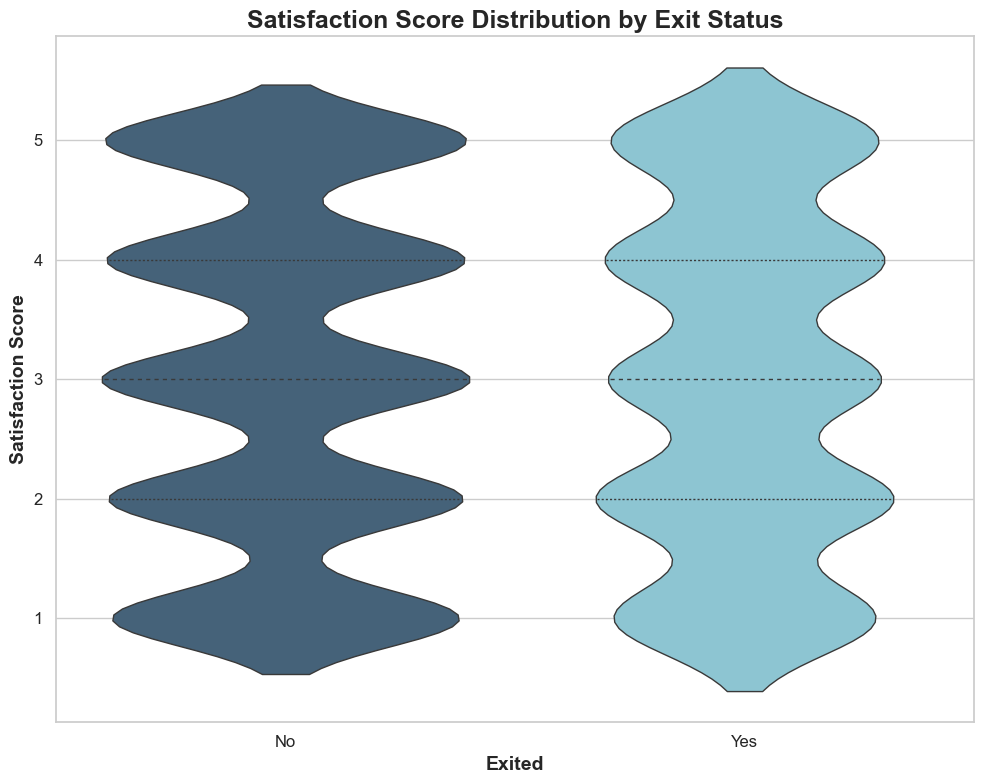

Mean Satisfaction Scores:

        Satisfaction Score
Exited                    
0                 3.018115
1                 2.995569 

Median Satisfaction Scores:

        Satisfaction Score
Exited                    
0                      3.0
1                      3.0 



In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style
sns.set(style='whitegrid')

custom_palette = sns.color_palette(['#3c6382', '#82ccdd'])

# Create the violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(x=data['Exited'], y=data['Satisfaction Score'], palette=custom_palette, inner='quartile', linewidth=1)
plt.xlabel('Exited', fontsize=14, fontweight='bold')
plt.xticks(np.arange(2), ['No', 'Yes'], fontsize=12)
plt.ylabel('Satisfaction Score', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12)
plt.title('Satisfaction Score Distribution by Exit Status', fontsize=18, fontweight='bold')
plt.tight_layout()

# Save the plot
plt.savefig('Q5.png', dpi=300)

# Display the plot
plt.show()

# Calculate the mean and median satisfaction scores for both groups
grouped_satisfaction = data.groupby('Exited')['Satisfaction Score']
mean_satisfaction_scores = grouped_satisfaction.mean()
median_satisfaction_scores = grouped_satisfaction.median()

# Display the mean and median satisfaction scores
print("Mean Satisfaction Scores:\n")
print(mean_satisfaction_scores.to_frame(), "\n")
print("Median Satisfaction Scores:\n")
print(median_satisfaction_scores.to_frame(), "\n")

### vi. The bank has a reward system where the customers earn points when they use their Diamond, Gold, Silver, and Platinum bank card. Determine if there is a significant difference in the average points earned by the different groups of customers

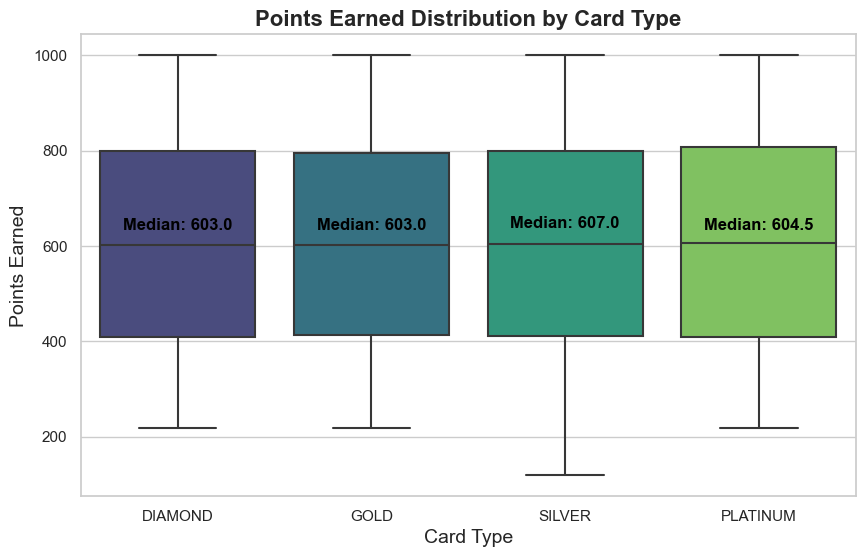

Mean Points Earned:

           Point Earned
Card Type              
DIAMOND      606.158210
GOLD         606.924309
PLATINUM     608.947833
SILVER       604.078778 

Median Points Earned:

           Point Earned
Card Type              
DIAMOND           603.0
GOLD              603.0
PLATINUM          607.0
SILVER            604.5 



In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group customers by card type
grouped_card_customers = data.groupby('Card Type')

# Create a box plot to visualize the distribution of points earned by customers using different card types
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x=data['Card Type'], y=data['Point Earned'], palette='viridis')
plt.xlabel('Card Type', fontsize=14)
plt.ylabel('Points Earned', fontsize=14)
plt.title('Points Earned Distribution by Card Type', fontsize=16, fontweight='bold')

# Add labels to show the median points earned for each group
medians = grouped_card_customers['Point Earned'].median().values
vertical_offset = data['Point Earned'].median() * 0.05
for xtick, ytick in zip(box_plot.get_xticks(), medians):
    box_plot.text(xtick, ytick + vertical_offset, f'Median: {ytick}', horizontalalignment='center', size='medium', color='black', weight='bold')

plt.savefig('Q6.png', dpi=300)
plt.show()

# Calculate the mean and median points earned for each card type
mean_points_earned = grouped_card_customers['Point Earned'].mean()
median_points_earned = grouped_card_customers['Point Earned'].median()

# Display the mean and median points earned
print("Mean Points Earned:\n")
print(mean_points_earned.to_frame(), "\n")
print("Median Points Earned:\n")
print(median_points_earned.to_frame(), "\n")

## Task B)

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('Main Sample.csv')

# Define the categories for each categorical variable
gender_categories = ['Female', 'Male']
location_categories = data['Location'].unique().tolist()
card_type_categories = data['Card Type'].unique().tolist()

# Encode the categorical variables using the categories
data['Gender'] = pd.Categorical(data['Gender'], categories=gender_categories).codes
data['Location'] = pd.Categorical(data['Location'], categories=location_categories).codes
data['Card Type'] = pd.Categorical(data['Card Type'], categories=card_type_categories).codes


# Standardize the numerical variables
scaler = StandardScaler()
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split the data into features (X) and target (y)
X = data.drop(columns=['CustomerId', 'Complain'])
y = data['Complain']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support as prfs

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Table Training Data Split
data_split = {'Data Type': ['Training', 'Testing'],
              'Number of Records': [len(X_train), len(X_test)],
              'Percentage': [f"{len(X_train) / (len(X_train) + len(X_test)) * 100:.2f}%",
                             f"{len(X_test) / (len(X_train) + len(X_test)) * 100:.2f}%"]}
table1 = pd.DataFrame(data_split)

# Table Confusion Matrix
confusion_matrix = pd.DataFrame(cm, columns=['Predicted No Complaint', 'Predicted Complaint'], index=['Actual No Complaint', 'Actual Complaint'])

print(table1)
print(confusion_matrix)

Confusion Matrix:
 [[1634    1]
 [   0  361]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1635
           1       1.00      1.00      1.00       361

    accuracy                           1.00      1996
   macro avg       1.00      1.00      1.00      1996
weighted avg       1.00      1.00      1.00      1996

Accuracy: 99.95%
  Data Type  Number of Records Percentage
0  Training               7984     80.00%
1   Testing               1996     20.00%
                     Predicted No Complaint  Predicted Complaint
Actual No Complaint                    1634                    1
Actual Complaint                          0                  361


## Task C)

In [11]:
# Load the new sample data
new_data = pd.read_csv('New Sample.csv')

# Preprocess the new sample data
new_data['Gender'] = pd.Categorical(new_data['Gender'], categories=gender_categories).codes
new_data['Location'] = pd.Categorical(new_data['Location'], categories=location_categories).codes
new_data['Card Type'] = pd.Categorical(new_data['Card Type'], categories=card_type_categories).codes
new_data[numerical_features] = scaler.transform(new_data[numerical_features])


# Separate the features from the CustomerId
X_new = new_data.drop(columns=['CustomerId'])

# Make predictions for the new sample
new_predictions = clf.predict(X_new)

# Combine the CustomerId with the predictions
predicted_complaints = pd.DataFrame({'CustomerId': new_data['CustomerId'], 'PredictedComplaint': new_predictions})

# Display the predicted complaints
print(predicted_complaints)

    CustomerId  PredictedComplaint
0     15710408                   0
1     15598695                   0
2     15649354                   0
3     15737556                   1
4     15671610                   0
5     15625092                   1
6     15741032                   0
7     15750014                   0
8     15784761                   1
9     15768359                   0
10    15805769                   0
11    15719508                   1
12    15609011                   1
13    15703106                   0
14    15626795                   1
15    15773731                   0
16    15756196                   0
17    15687903                   0
18    15777599                   0
19    15754577                   1
